In [338]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score



In [237]:
# Let us load the Train Data
train_df=pd.read_csv(r'train_ctrUa4K.csv')

In [238]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [239]:
# Let us load the test data
test_df=pd.read_csv(r'test_lAUu6dG.csv')

In [240]:
test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [241]:
# Let us check the rows and columns of the train and test data
train_df.shape,test_df.shape

((614, 13), (367, 12))

In [242]:
# Let us analyze the datatypes in the data
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [243]:
# There are 8 Object fields and they have null values in few columns
# Let us analyze the data to do preprocessing for the data
#dtypes: float64(4), int64(1), object(8)


In [244]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [245]:
# Test dtypes: float64(3), int64(2), object(7)
# Test data also have null values so let us combine them for preprocessing

In [246]:
train_test=pd.concat([train_df,test_df],axis=0).reset_index()

In [247]:
train_test.shape,train_df.shape,test_df.shape

((981, 14), (614, 13), (367, 12))

In [248]:
# Now let us analyze the data in the combined dataset for columns
train_test.Gender.isna().sum()

24

In [249]:
train_test.Gender.value_counts(dropna=False)

Male      775
Female    182
NaN        24
Name: Gender, dtype: int64

<AxesSubplot:>

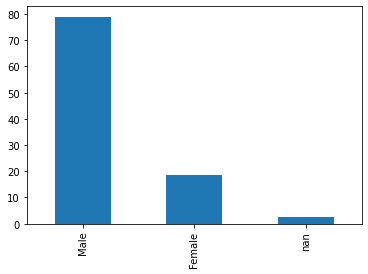

In [250]:
# Plotting the data by converting the value counts into %
(train_test.Gender.value_counts(dropna=False,normalize=True)*100).plot.bar()

In [251]:
# We could observe that almost 80% of the gender values are Male and we have 24 Null values, so let us fill the Null values by the 
# Mode value which is male

train_test['Gender']=train_test.Gender.fillna('Male')

In [252]:
# we have fixed the Gender column, so let us check other columns
train_test.Gender.value_counts(dropna=False)

Male      799
Female    182
Name: Gender, dtype: int64

In [253]:
# Married column has 3 null values
train_test.Married.isna().sum()

3

In [254]:
train_test.Married.value_counts(dropna=False)

Yes    631
No     347
NaN      3
Name: Married, dtype: int64

In [255]:
# Let us follow the similar approach for Married column
train_test['Married']=train_test.Married.fillna('Yes')

In [256]:
train_test.Married.value_counts(dropna=False)

Yes    634
No     347
Name: Married, dtype: int64

In [257]:
# Dependents column has 25 null values
train_test.Dependents.isna().sum()

25

In [258]:
train_test.Dependents.value_counts(dropna=False)

0      545
1      160
2      160
3+      91
NaN     25
Name: Dependents, dtype: int64

In [259]:
train_test[train_test.Dependents.isna()]

,index,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
102,102,LP001350,Male,Yes,NaN,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,Y
104,104,LP001357,Male,Yes,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
120,120,LP001426,Male,Yes,NaN,Graduate,No,5667,2667.0,180.0,360.0,1.0,Rural,Y
226,226,LP001754,Male,Yes,NaN,Not Graduate,Yes,4735,0.0,138.0,360.0,1.0,Urban,N
228,228,LP001760,Male,Yes,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
293,293,LP001945,Female,No,NaN,Graduate,No,5417,0.0,143.0,480.0,0.0,Urban,N
301,301,LP001972,Male,Yes,NaN,Not Graduate,No,2875,1750.0,105.0,360.0,1.0,Semiurban,Y
332,332,LP002100,Male,No,NaN,Graduate,No,2833,0.0,71.0,360.0,1.0,Urban,Y
335,335,LP002106,Male,Yes,NaN,Graduate,Yes,5503,4490.0,70.0,NaN,1.0,Semiurban,Y
346,346,LP002130,Male,Yes,NaN,Not Graduate,No,3523,3230.0,152.0,360.0,0.0,Rural,N


In [260]:
train_test['Dependents']=train_test.Dependents.fillna('0')

In [261]:
train_test.Dependents.value_counts(dropna=False)

0     570
1     160
2     160
3+     91
Name: Dependents, dtype: int64

In [262]:
# Education column has 0 null values
train_test.Education.isna().sum()

0

In [263]:
#Self employed column has 55 null values
train_test.Self_Employed.isna().sum()

55

In [264]:
train_test.Self_Employed.value_counts(dropna=False)

No     807
Yes    119
NaN     55
Name: Self_Employed, dtype: int64

In [265]:
train_test['Self_Employed']=train_test.Self_Employed.fillna('No')

In [266]:
train_test.Self_Employed.value_counts(dropna=False)

No     862
Yes    119
Name: Self_Employed, dtype: int64

In [267]:
train_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              981 non-null    int64  
 1   Loan_ID            981 non-null    object 
 2   Gender             981 non-null    object 
 3   Married            981 non-null    object 
 4   Dependents         981 non-null    object 
 5   Education          981 non-null    object 
 6   Self_Employed      981 non-null    object 
 7   ApplicantIncome    981 non-null    int64  
 8   CoapplicantIncome  981 non-null    float64
 9   LoanAmount         954 non-null    float64
 10  Loan_Amount_Term   961 non-null    float64
 11  Credit_History     902 non-null    float64
 12  Property_Area      981 non-null    object 
 13  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(2), object(8)
memory usage: 107.4+ KB


In [162]:
#Property_Area column has 0 null values
train_test.Property_Area.isna().sum()

0

In [163]:
# Now all the object columns null values have been addressed, now let us focus on float and int columns

<AxesSubplot:>

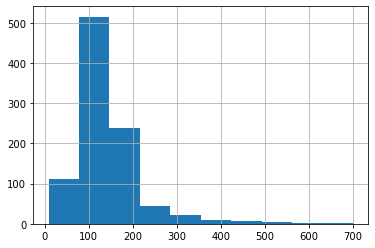

In [268]:
train_test.LoanAmount.hist()

In [269]:
# LoanAmount column has 25 null values
train_test.LoanAmount.isna().sum()

27

In [270]:
train_test.describe()

,index,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,981.000000,954.000000,961.000000,902.000000
mean,260.297655,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,165.715096,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,0.000000,9.000000,6.000000,0.000000
25%,122.000000,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,245.000000,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,368.000000,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,613.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [271]:
train_test[train_test.LoanAmount.isna()]

,index,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
35,35,LP001106,Male,Yes,0,Graduate,No,2275,2067.0,NaN,360.0,1.0,Urban,Y
63,63,LP001213,Male,Yes,1,Graduate,No,4945,0.0,NaN,360.0,0.0,Rural,N
81,81,LP001266,Male,Yes,1,Graduate,Yes,2395,0.0,NaN,360.0,1.0,Semiurban,Y
95,95,LP001326,Male,No,0,Graduate,No,6782,0.0,NaN,360.0,NaN,Urban,N
102,102,LP001350,Male,Yes,0,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,Y
103,103,LP001356,Male,Yes,0,Graduate,No,4652,3583.0,NaN,360.0,1.0,Semiurban,Y
113,113,LP001392,Female,No,1,Graduate,Yes,7451,0.0,NaN,360.0,1.0,Semiurban,Y
127,127,LP001449,Male,No,0,Graduate,No,3865,1640.0,NaN,360.0,1.0,Rural,Y
202,202,LP001682,Male,Yes,3+,Not Graduate,No,3992,0.0,NaN,180.0,1.0,Urban,N


In [272]:
train_test.groupby(['Gender','Education','Credit_History','Property_Area'])['LoanAmount'].sum().reset_index()

,Gender,Education,Credit_History,Property_Area,LoanAmount
0,Female,Graduate,0.0,Rural,528.0
1,Female,Graduate,0.0,Semiurban,1495.0
2,Female,Graduate,0.0,Urban,1292.0
3,Female,Graduate,1.0,Rural,3453.0
4,Female,Graduate,1.0,Semiurban,6678.0
5,Female,Graduate,1.0,Urban,3681.0
6,Female,Not Graduate,0.0,Semiurban,178.0
7,Female,Not Graduate,0.0,Urban,192.0
8,Female,Not Graduate,1.0,Rural,781.0
9,Female,Not Graduate,1.0,Semiurban,1355.0


In [273]:
# Let us now get the unique values in the Credit History column and plan to fill the null values
train_test.Credit_History.unique()

array([ 1.,  0., nan])

In [274]:
train_test.Credit_History.value_counts(dropna=False)

1.0    754
0.0    148
NaN     79
Name: Credit_History, dtype: int64

In [275]:
# Since more than 80% of the values have Credit Hstory as 1.0, let us fill the values as 1.0 as approach 1
train_test['Credit_History']=train_test.Credit_History.fillna(1.0)

In [276]:
train_test.Loan_Amount_Term.value_counts(dropna=False)

360.0    823
180.0     66
480.0     23
NaN       20
300.0     20
240.0      8
84.0       7
120.0      4
60.0       3
36.0       3
12.0       2
350.0      1
6.0        1
Name: Loan_Amount_Term, dtype: int64

In [277]:
train_test['Loan_Amount_Term']=train_test.Loan_Amount_Term.fillna(train_test['Loan_Amount_Term'].mean())

In [278]:
train_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              981 non-null    int64  
 1   Loan_ID            981 non-null    object 
 2   Gender             981 non-null    object 
 3   Married            981 non-null    object 
 4   Dependents         981 non-null    object 
 5   Education          981 non-null    object 
 6   Self_Employed      981 non-null    object 
 7   ApplicantIncome    981 non-null    int64  
 8   CoapplicantIncome  981 non-null    float64
 9   LoanAmount         954 non-null    float64
 10  Loan_Amount_Term   981 non-null    float64
 11  Credit_History     981 non-null    float64
 12  Property_Area      981 non-null    object 
 13  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(2), object(8)
memory usage: 107.4+ KB


In [279]:
# Now the Loan Amount column has null values and since it is an important field for deciding on Loan status, let us plan to address it in 
# following options . 1. Remove the rows with Loan Amount null, 2. Replace the Loan Amount with Median values 

array([[<AxesSubplot:title={'center':'index'}>,
        <AxesSubplot:title={'center':'ApplicantIncome'}>],
       [<AxesSubplot:title={'center':'CoapplicantIncome'}>,
        <AxesSubplot:title={'center':'LoanAmount'}>],
       [<AxesSubplot:title={'center':'Loan_Amount_Term'}>,
        <AxesSubplot:title={'center':'Credit_History'}>]], dtype=object)

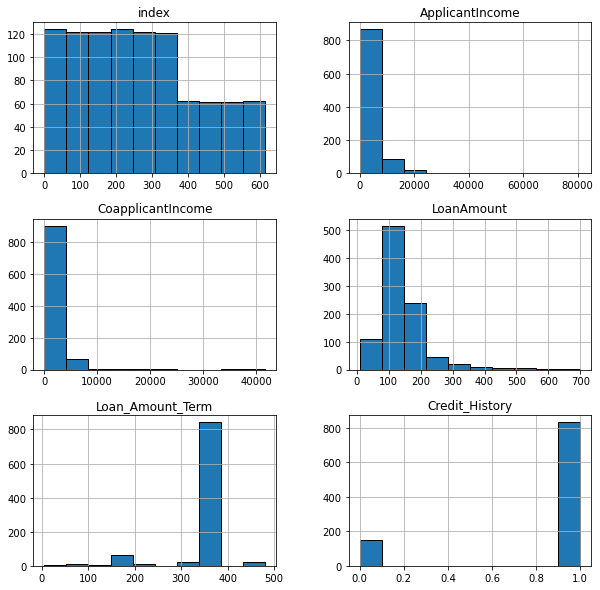

In [280]:
train_test.hist(edgecolor='black',figsize=(10,10))

In [281]:
# Let us identify the correlation between the independent and dependant variables
train_test.corr()

,index,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
index,1.000000,0.030192,0.030744,0.035574,-0.018333,-0.005863
ApplicantIncome,0.030192,1.000000,-0.114247,0.551811,-0.023051,0.020201
CoapplicantIncome,0.030744,-0.114247,1.000000,0.179228,-0.043705,-0.011531
LoanAmount,0.035574,0.551811,0.179228,1.000000,0.055439,-0.003637
Loan_Amount_Term,-0.018333,-0.023051,-0.043705,0.055439,1.000000,-0.018377
Credit_History,-0.005863,0.020201,-0.011531,-0.003637,-0.018377,1.000000


<AxesSubplot:>

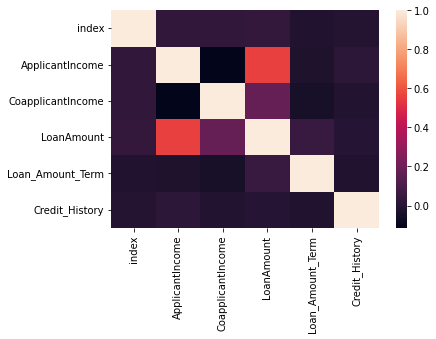

In [282]:
sns.heatmap(train_test.corr())

In [283]:
train_test_new=train_test[train_test.LoanAmount.notna()]

In [284]:
train_test_new.shape

(954, 14)

In [285]:
train_test_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 954 entries, 1 to 980
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              954 non-null    int64  
 1   Loan_ID            954 non-null    object 
 2   Gender             954 non-null    object 
 3   Married            954 non-null    object 
 4   Dependents         954 non-null    object 
 5   Education          954 non-null    object 
 6   Self_Employed      954 non-null    object 
 7   ApplicantIncome    954 non-null    int64  
 8   CoapplicantIncome  954 non-null    float64
 9   LoanAmount         954 non-null    float64
 10  Loan_Amount_Term   954 non-null    float64
 11  Credit_History     954 non-null    float64
 12  Property_Area      954 non-null    object 
 13  Loan_Status        592 non-null    object 
dtypes: float64(4), int64(2), object(8)
memory usage: 111.8+ KB


In [286]:
train_test_new.head()

,index,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [287]:
# Dropping the Loan_ID and index columns
train_test_new1=train_test_new.drop(columns=['Loan_ID','index'])

In [288]:
train_test_new1.shape

(954, 12)

In [289]:
one_hot_data=pd.get_dummies(train_test_new1[['Gender','Married','Education','Self_Employed','Property_Area']],columns=['Gender','Married','Education','Self_Employed','Property_Area'])

In [290]:
one_hot_data.shape

(954, 11)

In [291]:
one_hot_data.head()

,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,0,1,0,1,1,0,1,0,1,0,0
2,0,1,0,1,1,0,0,1,0,0,1
3,0,1,0,1,0,1,1,0,0,0,1
4,0,1,1,0,1,0,1,0,0,0,1
5,0,1,0,1,1,0,0,1,0,0,1


In [293]:
train_test['Loan_Status']=train_test['Loan_Status'].str.replace('N', '0')

In [295]:
train_test['Loan_Status']=train_test['Loan_Status'].str.replace('Y', '1')

In [296]:
train_test.Loan_Status.value_counts(dropna=False)

1      422
NaN    367
0      192
Name: Loan_Status, dtype: int64

In [297]:
train_test_new1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 954 entries, 1 to 980
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             954 non-null    object 
 1   Married            954 non-null    object 
 2   Dependents         954 non-null    object 
 3   Education          954 non-null    object 
 4   Self_Employed      954 non-null    object 
 5   ApplicantIncome    954 non-null    int64  
 6   CoapplicantIncome  954 non-null    float64
 7   LoanAmount         954 non-null    float64
 8   Loan_Amount_Term   954 non-null    float64
 9   Credit_History     954 non-null    float64
 10  Property_Area      954 non-null    object 
 11  Loan_Status        592 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 96.9+ KB


In [298]:
train_New = pd.concat([train_test_new1,one_hot_data],axis=1).reset_index()

In [299]:
train_New.shape

(954, 24)

In [300]:
# Train data excluding the test data and without one hot encoding data added
train_processed = train_New[train_New.Loan_Status.notna()]

In [301]:
train_processed.shape

(592, 24)

In [302]:
test_processed = train_New[train_New.Loan_Status.isna()]

In [303]:
test_processed.shape

(362, 24)

In [304]:
train_processed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 592 entries, 0 to 591
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   index                    592 non-null    int64  
 1   Gender                   592 non-null    object 
 2   Married                  592 non-null    object 
 3   Dependents               592 non-null    object 
 4   Education                592 non-null    object 
 5   Self_Employed            592 non-null    object 
 6   ApplicantIncome          592 non-null    int64  
 7   CoapplicantIncome        592 non-null    float64
 8   LoanAmount               592 non-null    float64
 9   Loan_Amount_Term         592 non-null    float64
 10  Credit_History           592 non-null    float64
 11  Property_Area            592 non-null    object 
 12  Loan_Status              592 non-null    object 
 13  Gender_Female            592 non-null    uint8  
 14  Gender_Male              5

In [306]:
train_processed['Loan_Status'].value_counts()

Y    411
N    181
Name: Loan_Status, dtype: int64

In [307]:
train_processed['Loan_Status']=train_processed['Loan_Status'].str.replace('N', '0')
train_processed['Loan_Status']=train_processed['Loan_Status'].str.replace('Y', '1')


C:\Users\ADMIN\AppData\Local\Temp/ipykernel_12472/1113360002.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_processed['Loan_Status']=train_processed['Loan_Status'].str.replace('N', '0')
C:\Users\ADMIN\AppData\Local\Temp/ipykernel_12472/1113360002.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_processed['Loan_Status']=train_processed['Loan_Status'].str.replace('Y', '1')


In [308]:
train_processed['Loan_Status']=train_processed['Loan_Status'].astype('int')   

C:\Users\ADMIN\AppData\Local\Temp/ipykernel_12472/3041416924.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_processed['Loan_Status']=train_processed['Loan_Status'].astype('int')


In [309]:
train_processed['Loan_Status'].value_counts()

1    411
0    181
Name: Loan_Status, dtype: int64

In [310]:
train_processed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 592 entries, 0 to 591
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   index                    592 non-null    int64  
 1   Gender                   592 non-null    object 
 2   Married                  592 non-null    object 
 3   Dependents               592 non-null    object 
 4   Education                592 non-null    object 
 5   Self_Employed            592 non-null    object 
 6   ApplicantIncome          592 non-null    int64  
 7   CoapplicantIncome        592 non-null    float64
 8   LoanAmount               592 non-null    float64
 9   Loan_Amount_Term         592 non-null    float64
 10  Credit_History           592 non-null    float64
 11  Property_Area            592 non-null    object 
 12  Loan_Status              592 non-null    int32  
 13  Gender_Female            592 non-null    uint8  
 14  Gender_Male              5

In [311]:
train_final=train_processed.drop(columns=(train_processed.select_dtypes(include='object').columns))

In [313]:
train_final=train_final.drop(columns=(['index']))

In [314]:
train_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 592 entries, 0 to 591
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ApplicantIncome          592 non-null    int64  
 1   CoapplicantIncome        592 non-null    float64
 2   LoanAmount               592 non-null    float64
 3   Loan_Amount_Term         592 non-null    float64
 4   Credit_History           592 non-null    float64
 5   Loan_Status              592 non-null    int32  
 6   Gender_Female            592 non-null    uint8  
 7   Gender_Male              592 non-null    uint8  
 8   Married_No               592 non-null    uint8  
 9   Married_Yes              592 non-null    uint8  
 10  Education_Graduate       592 non-null    uint8  
 11  Education_Not Graduate   592 non-null    uint8  
 12  Self_Employed_No         592 non-null    uint8  
 13  Self_Employed_Yes        592 non-null    uint8  
 14  Property_Area_Rural      5

In [315]:
test_processed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 362 entries, 592 to 953
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   index                    362 non-null    int64  
 1   Gender                   362 non-null    object 
 2   Married                  362 non-null    object 
 3   Dependents               362 non-null    object 
 4   Education                362 non-null    object 
 5   Self_Employed            362 non-null    object 
 6   ApplicantIncome          362 non-null    int64  
 7   CoapplicantIncome        362 non-null    float64
 8   LoanAmount               362 non-null    float64
 9   Loan_Amount_Term         362 non-null    float64
 10  Credit_History           362 non-null    float64
 11  Property_Area            362 non-null    object 
 12  Loan_Status              0 non-null      object 
 13  Gender_Female            362 non-null    uint8  
 14  Gender_Male             

In [316]:
test_final=test_processed.drop(columns=(test_processed.select_dtypes(include='object').columns))

In [317]:
test_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 362 entries, 592 to 953
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   index                    362 non-null    int64  
 1   ApplicantIncome          362 non-null    int64  
 2   CoapplicantIncome        362 non-null    float64
 3   LoanAmount               362 non-null    float64
 4   Loan_Amount_Term         362 non-null    float64
 5   Credit_History           362 non-null    float64
 6   Gender_Female            362 non-null    uint8  
 7   Gender_Male              362 non-null    uint8  
 8   Married_No               362 non-null    uint8  
 9   Married_Yes              362 non-null    uint8  
 10  Education_Graduate       362 non-null    uint8  
 11  Education_Not Graduate   362 non-null    uint8  
 12  Self_Employed_No         362 non-null    uint8  
 13  Self_Employed_Yes        362 non-null    uint8  
 14  Property_Area_Rural     

In [318]:
test_final=test_final.drop(columns=(['index']))

In [319]:
test_final.head(5)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
592,5720,0.0,110.0,360.0,1.0,0,1,0,1,1,0,1,0,0,0,1
593,3076,1500.0,126.0,360.0,1.0,0,1,0,1,1,0,1,0,0,0,1
594,5000,1800.0,208.0,360.0,1.0,0,1,0,1,1,0,1,0,0,0,1
595,2340,2546.0,100.0,360.0,1.0,0,1,0,1,1,0,1,0,0,0,1
596,3276,0.0,78.0,360.0,1.0,0,1,1,0,0,1,1,0,0,0,1


In [320]:
train_final.head(5)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,4583,1508.0,128.0,360.0,1.0,0,0,1,0,1,1,0,1,0,1,0,0
1,3000,0.0,66.0,360.0,1.0,1,0,1,0,1,1,0,0,1,0,0,1
2,2583,2358.0,120.0,360.0,1.0,1,0,1,0,1,0,1,1,0,0,0,1
3,6000,0.0,141.0,360.0,1.0,1,0,1,1,0,1,0,1,0,0,0,1
4,5417,4196.0,267.0,360.0,1.0,1,0,1,0,1,1,0,0,1,0,0,1


In [324]:
X=train_final.drop(columns=['Loan_Status'])

In [325]:
X.shape

(592, 16)

In [326]:
Y=train_final['Loan_Status']

In [327]:
Y.shape

(592,)

In [328]:
#### The values in the data is in different ranges, so let us standardize the data using the Standard Scalar

scale=StandardScaler()

In [329]:
scaled_X=scale.fit_transform(X)


In [330]:
train_X_scaled=pd.DataFrame(scaled_X,columns=X.columns)

In [331]:
train_X_scaled.head(3)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,-0.133353,-0.045404,-0.215309,0.276334,0.409454,-0.47505,0.47505,-0.730533,0.730533,0.522607,-0.522607,0.392423,-0.392423,1.556266,-0.791438,-0.690152
1,-0.390381,-0.553969,-0.940328,0.276334,0.409454,-0.47505,0.47505,-0.730533,0.730533,0.522607,-0.522607,-2.548268,2.548268,-0.642563,-0.791438,1.448957
2,-0.458088,0.241253,-0.308860,0.276334,0.409454,-0.47505,0.47505,-0.730533,0.730533,-1.913483,1.913483,0.392423,-0.392423,-0.642563,-0.791438,1.448957


In [332]:
TRAIN_X,TEST_X,TRAIN_Y,TEST_Y=train_test_split(train_X_scaled, Y, test_size=0.33, random_state=8)

In [333]:
TRAIN_X.shape,TEST_X.shape,TRAIN_Y.shape,TEST_Y.shape

((396, 16), (196, 16), (396,), (196,))

In [334]:
model=LogisticRegression(max_iter=500)

In [335]:
model.fit(TRAIN_X,TRAIN_Y)

LogisticRegression(max_iter=500)

In [336]:
y_pred=model.predict(TRAIN_X)

In [339]:
print('Train accuracy')
print('accuracy score',accuracy_score(TRAIN_Y,y_pred))
print('f1 score',f1_score(TRAIN_Y,y_pred))
print('confusion matrix\n',confusion_matrix(TRAIN_Y,y_pred))


Train accuracy
accuracy score 0.8358585858585859
f1 score 0.8943089430894309
confusion matrix
 [[ 56  59]
 [  6 275]]


In [341]:
y_pred_test=model.predict(TEST_X)

In [342]:
print('Test accuracy')
print('accuracy score',accuracy_score(TEST_Y,y_pred_test))
print('f1 score',f1_score(TEST_Y,y_pred_test))
print('confusion matrix\n',confusion_matrix(TEST_Y,y_pred_test))


Test accuracy
accuracy score 0.7755102040816326
f1 score 0.8523489932885905
confusion matrix
 [[ 25  41]
 [  3 127]]


In [343]:
test_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 362 entries, 592 to 953
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ApplicantIncome          362 non-null    int64  
 1   CoapplicantIncome        362 non-null    float64
 2   LoanAmount               362 non-null    float64
 3   Loan_Amount_Term         362 non-null    float64
 4   Credit_History           362 non-null    float64
 5   Gender_Female            362 non-null    uint8  
 6   Gender_Male              362 non-null    uint8  
 7   Married_No               362 non-null    uint8  
 8   Married_Yes              362 non-null    uint8  
 9   Education_Graduate       362 non-null    uint8  
 10  Education_Not Graduate   362 non-null    uint8  
 11  Self_Employed_No         362 non-null    uint8  
 12  Self_Employed_Yes        362 non-null    uint8  
 13  Property_Area_Rural      362 non-null    uint8  
 14  Property_Area_Semiurban 

In [344]:
scaled_test_X=scale.fit_transform(test_final)
scaled_test=pd.DataFrame(scaled_test_X,columns=test_final.columns)

In [345]:
scaled_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362 entries, 0 to 361
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ApplicantIncome          362 non-null    float64
 1   CoapplicantIncome        362 non-null    float64
 2   LoanAmount               362 non-null    float64
 3   Loan_Amount_Term         362 non-null    float64
 4   Credit_History           362 non-null    float64
 5   Gender_Female            362 non-null    float64
 6   Gender_Male              362 non-null    float64
 7   Married_No               362 non-null    float64
 8   Married_Yes              362 non-null    float64
 9   Education_Graduate       362 non-null    float64
 10  Education_Not Graduate   362 non-null    float64
 11  Self_Employed_No         362 non-null    float64
 12  Self_Employed_Yes        362 non-null    float64
 13  Property_Area_Rural      362 non-null    float64
 14  Property_Area_Semiurban  3

In [368]:
Y_sub=model.predict(scaled_test)

In [369]:
Y_sub.shape

(362,)

In [370]:
np.unique(Y_sub, return_counts=True)

(array([0, 1]), array([ 59, 303], dtype=int64))